# load fraud dataset

In [13]:
import pandas as pd
from sklearn.metrics import fbeta_score
from pycaret.anomaly import AnomalyExperiment

In [16]:
transaction_data = pd.read_csv(r"../Data/credit_card_transactional_data.csv")
X_data0 = transaction_data.drop(["Class", "Timestamp"], axis=1)
X_data = X_data0.fillna(X_data0.min()*2)
Y_true = transaction_data['Class']


In [22]:
norm_data = (X_data0 - X_data0.mean()) /2/X_data0.std()
norm_data.describe()

,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
count,1.400000e+05,1.162320e+05,1.297310e+05,1.296930e+05,1.400000e+05,1.296780e+05,1.165290e+05,1.255950e+05,1.296450e+05,1.400000e+05,1.298910e+05,1.256950e+05,1.258330e+05
mean,2.806644e-17,3.224682e-18,3.464232e-18,9.142500e-18,6.800909e-18,-4.397126e-18,5.548781e-18,-2.333683e-18,-7.590742e-18,-9.668457e-18,2.524543e-17,2.444884e-18,3.515078e-18
std,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
min,-1.674114e-01,-4.421979e+00,-3.333300e+00,-3.243669e+00,-3.369972e+00,-3.358682e+00,-4.301790e+00,-4.216160e+00,-3.307891e+00,-3.581577e+00,-3.297764e+00,-4.177392e+00,-4.195831e+00
25%,-1.570517e-01,1.609133e-02,1.069386e-01,4.593905e-02,-2.816747e-01,1.063125e-01,2.714180e-02,3.113344e-02,1.095949e-01,-3.331311e-01,1.057529e-01,3.207571e-02,3.149296e-02
50%,-1.260100e-01,2.760006e-02,1.086144e-01,9.654401e-02,-2.795810e-03,1.077438e-01,3.023727e-02,3.141212e-02,1.097875e-01,8.375531e-03,1.088012e-01,3.261865e-02,3.276977e-02
75%,-2.255815e-02,4.165575e-02,1.102683e-01,1.513540e-01,2.812300e-01,1.091671e-01,3.199692e-02,3.159645e-02,1.099776e-01,3.262802e-01,1.114565e-01,3.313389e-02,3.382672e-02
max,4.822437e+01,4.482744e+00,7.971585e-01,1.424831e+00,4.417145e+00,8.010215e-01,4.358886e+00,4.276762e+00,7.933694e-01,1.990531e+00,7.906246e-01,4.246927e+00,4.259225e+00


In [24]:
X_data = norm_data.fillna(norm_data.min()*2)
X_data.describe()

,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
count,1.400000e+05,140000.000000,140000.000000,140000.000000,1.400000e+05,140000.000000,140000.000000,140000.000000,140000.000000,1.400000e+05,140000.000000,140000.000000,140000.000000
mean,2.806644e-17,-1.501451,-0.488995,-0.477607,6.800909e-18,-0.495262,-1.442390,-0.867626,-0.489332,-9.668457e-18,-0.476244,-0.853680,-0.849176
std,5.000000e-01,3.351425,1.803470,1.761223,5.000000e-01,1.820209,3.246135,2.605311,1.797052,5.000000e-01,1.773765,2.574498,2.574810
min,-1.674114e-01,-8.843958,-6.666600,-6.487339,-3.369972e+00,-6.717365,-8.603579,-8.432320,-6.615782,-3.581577e+00,-6.595528,-8.354783,-8.391663
25%,-1.570517e-01,-0.127676,0.106383,0.026775,-2.816747e-01,0.105716,-0.117637,0.030841,0.109519,-3.331311e-01,0.105024,0.031878,0.030456
50%,-1.260100e-01,0.023235,0.108371,0.089256,-2.795810e-03,0.107575,0.029374,0.031364,0.109760,8.375531e-03,0.108495,0.032497,0.032496
75%,-2.255815e-02,0.037945,0.110149,0.145829,2.812300e-01,0.109042,0.031631,0.031572,0.109959,3.262802e-01,0.111219,0.033068,0.033719
max,4.822437e+01,4.482744,0.797158,1.424831,4.417145e+00,0.801021,4.358886,4.276762,0.793369,1.990531e+00,0.790625,4.246927,4.259225


In [25]:
fraud_ses = AnomalyExperiment()
fraud_ses.exp_name_log = "FraudDetection"
fraud_ses.setup(X_data)

,Description,Value
0,Session id,4384
1,Original data shape,"(140000, 13)"
2,Transformed data shape,"(140000, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [62]:
model = fraud_ses.create_model("lof")

In [65]:
sig = inspect.signature(model.__init__)
sig.parameters.keys()

odict_keys(['n_neighbors', 'algorithm', 'leaf_size', 'metric', 'p', 'metric_params', 'contamination', 'n_jobs', 'novelty'])

In [43]:
from pyod.models.lof import LOF


In [37]:
mod = __import__('pyod.models.lof')

In [55]:
mod.models.lof.LOF


pyod.models.lof.LOF

In [51]:
models = getattr(mod, 'models')
lof = getattr(models, 'lof')
lof = getattr(lof, 'LOF')

In [53]:
import inspect

In [56]:
sig = inspect.signature(lof.__init__)

In [61]:
'algorithm' in sig._parameters.keys()

True

In [27]:
model = fraud_ses.create_model("lof", n_neighbors = 10,
    algorithm = "ball_tree",
    leaf_size = 10,
    p = 2,
    fraction = 0.01)

In [28]:
y_pred = fraud_ses.assign_model(model)

In [30]:
fbeta_score(Y_true, y_pred['Anomaly'], beta=2)

0.010364842454394691

<Axes: xlabel='Category', ylabel='scores'>

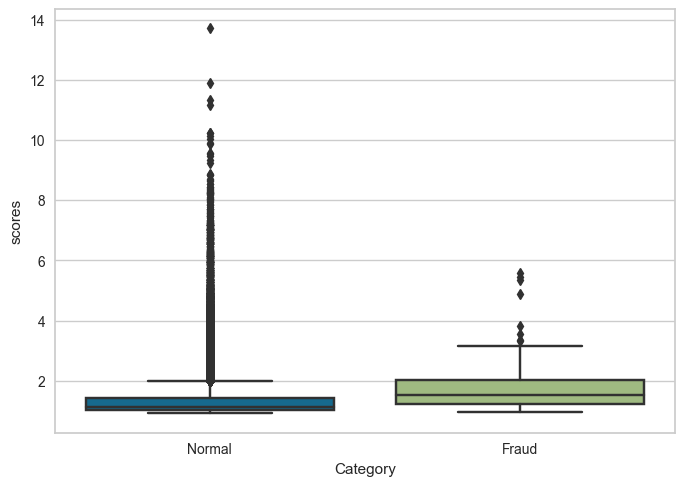

In [29]:
transaction_data['scores'] = y_pred['Anomaly_Score']
transaction_data['Category'] = ['Normal' if x == 0 else "Fraud" for x in transaction_data['Class']]
sns.boxplot(x=transaction_data['Category'], y=transaction_data['scores'])

In [12]:
best_model = fraud_ses.load_model("../cur_best_iforest0.1549")
best_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/xs/kckld1vs7r714dlrd1t9llwr0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Value', 'C1', 'C2', 'C3', 'C4',
                                             'C5', 'C6', 'C7', 'C8', 'C9',
                                             'C10', 'C11', 'C12'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.0033783392065649498,
    max_features=0.1485293549246253, max_samples=0.49639807737014874,
    n_estimators=120, n_jobs=-1, random_state=821, verbose=0))])

In [14]:
y_pred = fraud_ses.predict_model(best_model, X_data)
fbeta_score(Y_true, y_pred['Anomaly'], beta=2)

0.1548821548821549

<Axes: xlabel='Category', ylabel='scores'>

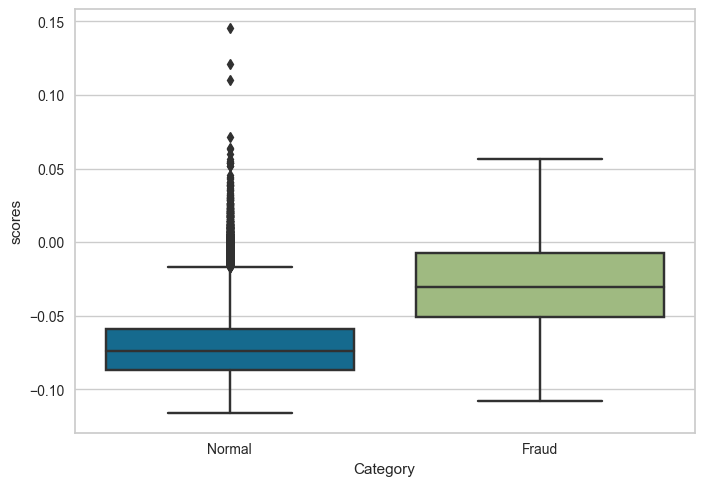

In [15]:
import seaborn as sns
transaction_data['scores'] = y_pred['Anomaly_Score']
transaction_data['Category'] = ['Normal' if x == 0 else "Fraud" for x in transaction_data['Class']]
sns.boxplot(x=transaction_data['Category'], y=transaction_data['scores'])

In [6]:
fraud_ses.models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
import optuna
from sklearn.metrics import fbeta_score

In [56]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_samples = trial.suggest_float('max_samples', 0.1, 1.0)
    contamination = trial.suggest_float('contamination', 0.001, 0.05, log=True)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    model = fraud_ses.create_model("iforest", n_estimators = n_estimators,
                           max_samples = max_samples,
                           max_features = max_features,
                           random_state=3490,
                           fraction = contamination, # pay attention here!
                           n_jobs=-1)
    pred_result = fraud_ses.assign_model(model)
    anomaly_pred = pred_result['Anomaly']
    
    return -fbeta_score(Y_true, anomaly_pred, beta=2)
    
study = optuna.load_study(
        study_name="project-pro", storage="mysql://root@localhost/pp_iforest"
    )
study.optimize(objective, n_trials=100)

[I 2023-08-27 22:56:58,268] Trial 20 finished with value: -0.030579131303045435 and parameters: {'contamination': 0.005999485036923475, 'max_features': 0.3082476014653094, 'max_samples': 0.7375747016505865, 'n_estimators': 500}. Best is trial 10 with value: -0.07863205192211682.


[I 2023-08-27 22:57:33,341] Trial 22 finished with value: -0.07675986020968546 and parameters: {'contamination': 0.013809437393002546, 'max_features': 0.10888395114034334, 'max_samples': 0.8690901076906039, 'n_estimators': 450}. Best is trial 10 with value: -0.07863205192211682.


[I 2023-08-27 22:57:59,519] Trial 24 finished with value: -0.0517973040439341 and parameters: {'contamination': 0.014736407949875826, 'max_features': 0.17656189279990447, 'max_samples': 0.9066771747155761, 'n_estimators': 372}. Best is trial 10 with value: -0.07863205192211682.


[I 2023-08-27 22:58:21,003] Trial 25 finished with value: -0.08112830753869196 and parameters: {'contamination': 0.0012754683339327522, 'max_features': 0.10661906816747645, 'max_samples': 0.9081850254741408, 'n_estimators': 305}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 22:58:37,793] Trial 27 finished with value: -0.043060409385921115 and parameters: {'contamination': 0.004651018817501828, 'max_features': 0.25985006262974336, 'max_samples': 0.823675421081409, 'n_estimators': 254}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 22:58:59,568] Trial 29 finished with value: -0.057413879181228165 and parameters: {'contamination': 0.0012232910434049435, 'max_features': 0.19199709242999274, 'max_samples': 0.7350221878965533, 'n_estimators': 311}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 22:59:17,793] Trial 31 finished with value: -0.029955067398901643 and parameters: {'contamination': 0.007817538476268596, 'max_features': 0.43059748568539746, 'max_samples': 0.5408350139227708, 'n_estimators': 274}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 22:59:46,738] Trial 34 finished with value: -0.05054917623564653 and parameters: {'contamination': 0.00411907344145805, 'max_features': 0.16444335007817973, 'max_samples': 0.8536215151632164, 'n_estimators': 425}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:00:17,204] Trial 36 finished with value: -0.031827259111333 and parameters: {'contamination': 0.0112781656393645, 'max_features': 0.3102057920703975, 'max_samples': 0.9319001780570679, 'n_estimators': 465}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:00:30,925] Trial 38 finished with value: -0.04867698452321517 and parameters: {'contamination': 0.008746482264264811, 'max_features': 0.23384825638649703, 'max_samples': 0.9991883306213147, 'n_estimators': 190}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:00:57,351] Trial 40 finished with value: -0.07863205192211682 and parameters: {'contamination': 0.0011001182948092388, 'max_features': 0.14700879509304338, 'max_samples': 0.8799236335934286, 'n_estimators': 393}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:01:53,181] Trial 42 finished with value: -0.0792561158262606 and parameters: {'contamination': 0.0032311921010746486, 'max_features': 0.14400830832541672, 'max_samples': 0.8739512442212636, 'n_estimators': 397}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:02:28,171] Trial 44 finished with value: -0.07738392411382924 and parameters: {'contamination': 0.0010268014169881796, 'max_features': 0.14004669173516177, 'max_samples': 0.8200777359333574, 'n_estimators': 394}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:02:51,325] Trial 46 finished with value: -0.055541687468796806 and parameters: {'contamination': 0.003764260580664203, 'max_features': 0.20453755006044977, 'max_samples': 0.9413321961217328, 'n_estimators': 312}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:03:15,309] Trial 48 finished with value: -0.03307538691962057 and parameters: {'contamination': 0.00933409583444159, 'max_features': 0.3536567062732042, 'max_samples': 0.8809123106711567, 'n_estimators': 358}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:03:34,631] Trial 50 finished with value: -0.044932601098352475 and parameters: {'contamination': 0.006013920029737437, 'max_features': 0.2644012239392821, 'max_samples': 0.7970375608953549, 'n_estimators': 286}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:04:05,033] Trial 52 finished with value: -0.07675986020968546 and parameters: {'contamination': 0.0024964151258430357, 'max_features': 0.14809535398938037, 'max_samples': 0.8598448839979038, 'n_estimators': 434}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:04:30,777] Trial 54 finished with value: -0.07675986020968546 and parameters: {'contamination': 0.003094762347068153, 'max_features': 0.13874207297985025, 'max_samples': 0.8281881455857584, 'n_estimators': 379}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:04:53,538] Trial 56 finished with value: -0.05366949575636545 and parameters: {'contamination': 0.007421176609062007, 'max_features': 0.19317093103316757, 'max_samples': 0.9089374638665433, 'n_estimators': 337}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:04:58,553] Trial 58 finished with value: -0.07488766849725412 and parameters: {'contamination': 0.005163827299688518, 'max_features': 0.13348684536051725, 'max_samples': 0.7857624259101721, 'n_estimators': 70}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:05:21,886] Trial 59 finished with value: -0.0792561158262606 and parameters: {'contamination': 0.007726556712915085, 'max_features': 0.1036109544905425, 'max_samples': 0.9106117807621729, 'n_estimators': 347}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:05:45,599] Trial 61 finished with value: -0.05616575137294059 and parameters: {'contamination': 0.004571483368734201, 'max_features': 0.17114029455057522, 'max_samples': 0.9719012175163927, 'n_estimators': 296}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:06:16,999] Trial 64 finished with value: -0.07863205192211682 and parameters: {'contamination': 0.0011677242115879177, 'max_features': 0.1243078039339957, 'max_samples': 0.9038304188485362, 'n_estimators': 348}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:06:45,998] Trial 65 finished with value: -0.0792561158262606 and parameters: {'contamination': 0.00675546520806675, 'max_features': 0.12097886411957637, 'max_samples': 0.9107400417401776, 'n_estimators': 323}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:12:00,466] Trial 67 finished with value: -0.055541687468796806 and parameters: {'contamination': 0.012358316496992004, 'max_features': 0.17863445316423548, 'max_samples': 0.8672397404937485, 'n_estimators': 314}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:15:32,128] Trial 70 finished with value: -0.05678981527708438 and parameters: {'contamination': 0.006649247172491082, 'max_features': 0.16498868479722253, 'max_samples': 0.9679132959397753, 'n_estimators': 344}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:16:44,866] Trial 73 finished with value: -0.0798801797304044 and parameters: {'contamination': 0.0044697916863521234, 'max_features': 0.12798428588566255, 'max_samples': 0.8981193360231732, 'n_estimators': 351}. Best is trial 25 with value: -0.08112830753869196.


[I 2023-08-27 23:17:16,095] Trial 75 finished with value: -0.08112830753869196 and parameters: {'contamination': 0.008579608893652911, 'max_features': 0.1205887279926861, 'max_samples': 0.8834356348200612, 'n_estimators': 416}. Best is trial 75 with value: -0.08112830753869196.


[I 2023-08-27 23:17:39,625] Trial 77 finished with value: -0.05866200698951573 and parameters: {'contamination': 0.008533241602051456, 'max_features': 0.19009511681045782, 'max_samples': 0.9470342370517334, 'n_estimators': 302}. Best is trial 75 with value: -0.08112830753869196.


[I 2023-08-27 23:18:11,222] Trial 79 finished with value: -0.0798801797304044 and parameters: {'contamination': 0.010547005407594283, 'max_features': 0.12143417515764991, 'max_samples': 0.9997745149481129, 'n_estimators': 418}. Best is trial 75 with value: -0.08112830753869196.


[I 2023-08-27 23:18:43,868] Trial 81 finished with value: -0.08300049925112332 and parameters: {'contamination': 0.010478633364989451, 'max_features': 0.12039067371527061, 'max_samples': 0.9969844226272931, 'n_estimators': 442}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-27 23:19:57,312] Trial 83 finished with value: -0.060534198701947074 and parameters: {'contamination': 0.010445815475933661, 'max_features': 0.15587441982115305, 'max_samples': 0.995291837357562, 'n_estimators': 438}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-27 23:20:30,190] Trial 85 finished with value: -0.07675986020968546 and parameters: {'contamination': 0.016379006894740533, 'max_features': 0.10050949489821889, 'max_samples': 0.9316971140992008, 'n_estimators': 457}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-27 23:21:08,234] Trial 88 finished with value: -0.042436345481777334 and parameters: {'contamination': 0.008223737061385978, 'max_features': 0.2415123624499193, 'max_samples': 0.8995171444339791, 'n_estimators': 405}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-27 23:21:52,923] Trial 89 finished with value: -0.0792561158262606 and parameters: {'contamination': 0.013119559284612352, 'max_features': 0.12480891533993335, 'max_samples': 0.9528331959613647, 'n_estimators': 433}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-27 23:27:32,250] Trial 92 finished with value: -0.07863205192211682 and parameters: {'contamination': 0.0074260733610778795, 'max_features': 0.12650035577182314, 'max_samples': 0.863281196906494, 'n_estimators': 435}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-27 23:28:19,256] Trial 94 finished with value: -0.08237643534697953 and parameters: {'contamination': 0.005864504717996337, 'max_features': 0.14969351647691653, 'max_samples': 0.9647743792277791, 'n_estimators': 427}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 00:21:40,239] Trial 96 finished with value: -0.052421367948077884 and parameters: {'contamination': 0.0054308400035421615, 'max_features': 0.18067365798903764, 'max_samples': 0.8939348615227953, 'n_estimators': 452}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 02:15:20,186] Trial 98 finished with value: -0.05366949575636545 and parameters: {'contamination': 0.0023937329610367007, 'max_features': 0.2136334813852392, 'max_samples': 0.9315611438458272, 'n_estimators': 402}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 04:27:33,380] Trial 100 finished with value: -0.08050424363454818 and parameters: {'contamination': 0.003906401112778693, 'max_features': 0.15024346816689116, 'max_samples': 0.9754033776627462, 'n_estimators': 381}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 05:18:28,283] Trial 102 finished with value: -0.08112830753869196 and parameters: {'contamination': 0.002096250200553071, 'max_features': 0.11662942431158604, 'max_samples': 0.9882127078354063, 'n_estimators': 328}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 06:13:55,287] Trial 104 finished with value: -0.08112830753869196 and parameters: {'contamination': 0.0022292530027336324, 'max_features': 0.1440593357848643, 'max_samples': 0.9812771154293277, 'n_estimators': 373}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 07:19:03,036] Trial 106 finished with value: -0.05366949575636545 and parameters: {'contamination': 0.0018720501585035726, 'max_features': 0.1971028923892834, 'max_samples': 0.9993381766773748, 'n_estimators': 332}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 07:20:07,306] Trial 108 finished with value: -0.055541687468796806 and parameters: {'contamination': 0.003422958107944285, 'max_features': 0.1701765642165809, 'max_samples': 0.9779987622195445, 'n_estimators': 414}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 07:20:37,919] Trial 110 finished with value: -0.04680479281078382 and parameters: {'contamination': 0.0021471393056186495, 'max_features': 0.23470336914880513, 'max_samples': 0.9584089519912408, 'n_estimators': 395}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 07:21:02,924] Trial 112 finished with value: -0.08050424363454818 and parameters: {'contamination': 0.004510096841145202, 'max_features': 0.11414366942667258, 'max_samples': 0.9310790648218814, 'n_estimators': 352}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 07:21:41,510] Trial 113 finished with value: -0.07863205192211682 and parameters: {'contamination': 0.004114918502038316, 'max_features': 0.11631216430302982, 'max_samples': 0.9473681648160621, 'n_estimators': 304}. Best is trial 81 with value: -0.08300049925112332.


[I 2023-08-28 07:22:51,982] Trial 116 finished with value: -0.08487269096355467 and parameters: {'contamination': 0.0057798669629399516, 'max_features': 0.13773125084924318, 'max_samples': 0.9230752716647671, 'n_estimators': 277}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:23:12,284] Trial 117 finished with value: -0.08424862705941087 and parameters: {'contamination': 0.005277398626954033, 'max_features': 0.14115964206848164, 'max_samples': 0.9242762640470017, 'n_estimators': 288}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:23:31,934] Trial 119 finished with value: -0.05366949575636545 and parameters: {'contamination': 0.00607883561285128, 'max_features': 0.16361285913677676, 'max_samples': 0.9308208359955858, 'n_estimators': 271}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:23:51,800] Trial 121 finished with value: -0.05803794308537194 and parameters: {'contamination': 0.0071717797387176666, 'max_features': 0.18281052076636164, 'max_samples': 0.9159340783460137, 'n_estimators': 290}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:24:14,595] Trial 123 finished with value: -0.08300049925112332 and parameters: {'contamination': 0.0032034107574674866, 'max_features': 0.10045466054034857, 'max_samples': 0.9632515926955372, 'n_estimators': 308}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:24:32,480] Trial 126 finished with value: -0.08424862705941087 and parameters: {'contamination': 0.0033006309269872328, 'max_features': 0.1121881603090071, 'max_samples': 0.9831050276095454, 'n_estimators': 246}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:24:53,078] Trial 128 finished with value: -0.08487269096355467 and parameters: {'contamination': 0.008603895909077617, 'max_features': 0.14217879746655218, 'max_samples': 0.9780840861863068, 'n_estimators': 280}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:25:16,664] Trial 130 finished with value: -0.0836245631552671 and parameters: {'contamination': 0.008061718275139476, 'max_features': 0.14617627906686895, 'max_samples': 0.9825403949288343, 'n_estimators': 319}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:25:31,591] Trial 132 finished with value: -0.08424862705941087 and parameters: {'contamination': 0.008705187474034454, 'max_features': 0.13719218473300882, 'max_samples': 0.9853037360971051, 'n_estimators': 203}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:25:43,588] Trial 134 finished with value: -0.05491762356465303 and parameters: {'contamination': 0.008435483890602193, 'max_features': 0.16761874469926713, 'max_samples': 0.9545898694537942, 'n_estimators': 158}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:25:59,412] Trial 135 finished with value: -0.08487269096355467 and parameters: {'contamination': 0.011431152593430045, 'max_features': 0.13684845056553716, 'max_samples': 0.9602639602804638, 'n_estimators': 204}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:26:51,239] Trial 137 finished with value: -0.05803794308537194 and parameters: {'contamination': 0.012051583612746195, 'max_features': 0.19956988302106216, 'max_samples': 0.9044467889083343, 'n_estimators': 209}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:27:15,261] Trial 140 finished with value: -0.063654518222666 and parameters: {'contamination': 0.007734223085597616, 'max_features': 0.15924626270546594, 'max_samples': 0.9601383079579944, 'n_estimators': 241}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:27:38,883] Trial 142 finished with value: -0.0836245631552671 and parameters: {'contamination': 0.009194632705324264, 'max_features': 0.10302814844768265, 'max_samples': 0.9987276450501861, 'n_estimators': 318}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:28:01,801] Trial 144 finished with value: -0.08175237144283574 and parameters: {'contamination': 0.00895657104445788, 'max_features': 0.12460459068562105, 'max_samples': 0.94177336932327, 'n_estimators': 310}. Best is trial 116 with value: -0.08487269096355467.


[I 2023-08-28 07:28:16,576] Trial 147 finished with value: -0.08612081877184223 and parameters: {'contamination': 0.006762370434478793, 'max_features': 0.1381898811175073, 'max_samples': 0.9810026719619328, 'n_estimators': 200}. Best is trial 147 with value: -0.08612081877184223.


[I 2023-08-28 07:28:35,707] Trial 149 finished with value: -0.05054917623564653 and parameters: {'contamination': 0.006583773522075803, 'max_features': 0.2842354478467708, 'max_samples': 0.9851812418244145, 'n_estimators': 265}. Best is trial 147 with value: -0.08612081877184223.


[I 2023-08-28 07:29:27,351] Trial 151 finished with value: -0.05678981527708438 and parameters: {'contamination': 0.011142569205450063, 'max_features': 0.22742653571824378, 'max_samples': 0.9986081360496047, 'n_estimators': 195}. Best is trial 147 with value: -0.08612081877184223.


[I 2023-08-28 07:30:10,569] Trial 154 finished with value: -0.08424862705941087 and parameters: {'contamination': 0.008814325943162966, 'max_features': 0.10148905630361511, 'max_samples': 0.9674285386871838, 'n_estimators': 280}. Best is trial 147 with value: -0.08612081877184223.


[I 2023-08-28 07:30:30,984] Trial 158 finished with value: -0.0836245631552671 and parameters: {'contamination': 0.006675902563069398, 'max_features': 0.1368609677318071, 'max_samples': 0.9405078515832943, 'n_estimators': 233}. Best is trial 147 with value: -0.08612081877184223.


[I 2023-08-28 07:31:12,364] Trial 160 finished with value: -0.05678981527708438 and parameters: {'contamination': 0.006818687006049618, 'max_features': 0.16347724171357772, 'max_samples': 0.649594964496911, 'n_estimators': 251}. Best is trial 147 with value: -0.08612081877184223.


[I 2023-08-28 07:32:02,192] Trial 163 finished with value: -0.08612081877184223 and parameters: {'contamination': 0.006011396479526615, 'max_features': 0.12393103289754856, 'max_samples': 0.9816303107260675, 'n_estimators': 214}. Best is trial 147 with value: -0.08612081877184223.


[I 2023-08-28 07:34:17,610] Trial 165 finished with value: -0.08674488267598603 and parameters: {'contamination': 0.005553519279976174, 'max_features': 0.14290445848192374, 'max_samples': 0.9838285625889155, 'n_estimators': 232}. Best is trial 165 with value: -0.08674488267598603.


[I 2023-08-28 07:34:32,176] Trial 167 finished with value: -0.059910134797803286 and parameters: {'contamination': 0.00611029122170631, 'max_features': 0.1736558919797281, 'max_samples': 0.9990182908388839, 'n_estimators': 199}. Best is trial 165 with value: -0.08674488267598603.


[I 2023-08-28 07:36:48,264] Trial 169 finished with value: -0.08736894658012982 and parameters: {'contamination': 0.0050597334320996905, 'max_features': 0.1159109440119982, 'max_samples': 0.9230846037741187, 'n_estimators': 218}. Best is trial 169 with value: -0.08736894658012982.


[I 2023-08-28 07:37:00,822] Trial 171 finished with value: -0.08799301048427359 and parameters: {'contamination': 0.004700195587183917, 'max_features': 0.11629177738394027, 'max_samples': 0.7639024975803201, 'n_estimators': 185}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:22:36,014] Trial 173 finished with value: -0.08799301048427359 and parameters: {'contamination': 0.0051195776305344625, 'max_features': 0.1179205299703537, 'max_samples': 0.736090429028778, 'n_estimators': 215}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:28:47,244] Trial 174 finished with value: -0.08424862705941087 and parameters: {'contamination': 0.007611047569659211, 'max_features': 0.12216750043276664, 'max_samples': 0.7622086793617547, 'n_estimators': 164}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:28:58,201] Trial 175 finished with value: -0.026834747878182724 and parameters: {'contamination': 0.008125399594958966, 'max_features': 0.40361751557071224, 'max_samples': 0.7531613652205521, 'n_estimators': 163}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:29:11,939] Trial 176 finished with value: -0.0836245631552671 and parameters: {'contamination': 0.007408639212932705, 'max_features': 0.13255257811968235, 'max_samples': 0.8717983102000778, 'n_estimators': 203}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:29:24,481] Trial 177 finished with value: -0.05616575137294059 and parameters: {'contamination': 0.007758435865919064, 'max_features': 0.15493576368773973, 'max_samples': 0.7219033117587126, 'n_estimators': 188}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:29:38,404] Trial 178 finished with value: -0.08549675486769845 and parameters: {'contamination': 0.0048140517684660735, 'max_features': 0.13594395837544387, 'max_samples': 0.811631419104519, 'n_estimators': 205}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:29:48,280] Trial 179 finished with value: -0.05678981527708438 and parameters: {'contamination': 0.0046358173065119, 'max_features': 0.16845697722658615, 'max_samples': 0.7529051772630977, 'n_estimators': 146}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:30:02,744] Trial 180 finished with value: -0.08549675486769845 and parameters: {'contamination': 0.005113667196032714, 'max_features': 0.14266280509168522, 'max_samples': 0.7983816142503342, 'n_estimators': 216}. Best is trial 171 with value: -0.08799301048427359.


[I 2023-08-28 08:30:16,833] Trial 181 finished with value: -0.08986520219670495 and parameters: {'contamination': 0.004615241955162514, 'max_features': 0.14211144184910798, 'max_samples': 0.7978415437353712, 'n_estimators': 213}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:30:30,667] Trial 182 finished with value: -0.08674488267598603 and parameters: {'contamination': 0.0038322829974405974, 'max_features': 0.11691467607166775, 'max_samples': 0.7931840361028634, 'n_estimators': 205}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:30:44,935] Trial 183 finished with value: -0.08674488267598603 and parameters: {'contamination': 0.003761693705445897, 'max_features': 0.1531190633520232, 'max_samples': 0.7925462844265508, 'n_estimators': 212}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:30:59,438] Trial 184 finished with value: -0.0836245631552671 and parameters: {'contamination': 0.0034005433117593126, 'max_features': 0.12103733039292243, 'max_samples': 0.8016567617731806, 'n_estimators': 214}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:31:13,226] Trial 185 finished with value: -0.06303045431852221 and parameters: {'contamination': 0.004340602620373946, 'max_features': 0.16099280985848535, 'max_samples': 0.7792536285039983, 'n_estimators': 204}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:31:26,258] Trial 186 finished with value: -0.05304543185222167 and parameters: {'contamination': 0.004779813975741648, 'max_features': 0.18626023953418022, 'max_samples': 0.7891700265015746, 'n_estimators': 191}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:31:37,620] Trial 187 finished with value: -0.08050424363454818 and parameters: {'contamination': 0.003577689224577828, 'max_features': 0.14471612480220492, 'max_samples': 0.807275311054909, 'n_estimators': 169}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:31:52,301] Trial 188 finished with value: -0.08549675486769845 and parameters: {'contamination': 0.005402487008467797, 'max_features': 0.11976237063294595, 'max_samples': 0.8266441193709471, 'n_estimators': 217}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:32:06,606] Trial 189 finished with value: -0.0237144283574638 and parameters: {'contamination': 0.005215411550638894, 'max_features': 0.7322679770980536, 'max_samples': 0.8323713482280153, 'n_estimators': 218}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:32:20,067] Trial 190 finished with value: -0.06115826260609087 and parameters: {'contamination': 0.0038784302399358546, 'max_features': 0.21110213625493718, 'max_samples': 0.775511110950536, 'n_estimators': 203}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:32:32,193] Trial 191 finished with value: -0.08424862705941087 and parameters: {'contamination': 0.005325701854294538, 'max_features': 0.12158704335410436, 'max_samples': 0.8117135729445482, 'n_estimators': 184}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:32:47,103] Trial 192 finished with value: -0.08674488267598603 and parameters: {'contamination': 0.0031072722621965287, 'max_features': 0.13521708863005277, 'max_samples': 0.7884793609943895, 'n_estimators': 227}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:33:02,479] Trial 193 finished with value: -0.057413879181228165 and parameters: {'contamination': 0.0029105675887881443, 'max_features': 0.1551072885026424, 'max_samples': 0.783527001542507, 'n_estimators': 229}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:33:17,065] Trial 194 finished with value: -0.08175237144283574 and parameters: {'contamination': 0.0043398942691757385, 'max_features': 0.13529999111697902, 'max_samples': 0.836747591024471, 'n_estimators': 215}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:33:31,737] Trial 195 finished with value: -0.04992511233150274 and parameters: {'contamination': 0.0032693000135325017, 'max_features': 0.24903354041593306, 'max_samples': 0.8177501543616644, 'n_estimators': 219}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:33:45,196] Trial 196 finished with value: -0.08799301048427359 and parameters: {'contamination': 0.005801085250153386, 'max_features': 0.11584717716356681, 'max_samples': 0.795447699382847, 'n_estimators': 202}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:33:58,539] Trial 197 finished with value: -0.05616575137294059 and parameters: {'contamination': 0.005464692577838782, 'max_features': 0.17041532716817215, 'max_samples': 0.79891514067002, 'n_estimators': 196}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:34:14,258] Trial 198 finished with value: -0.0836245631552671 and parameters: {'contamination': 0.004082068429256661, 'max_features': 0.14111427240173857, 'max_samples': 0.7917657472298876, 'n_estimators': 238}. Best is trial 181 with value: -0.08986520219670495.


[I 2023-08-28 08:34:27,902] Trial 199 finished with value: -0.08424862705941087 and parameters: {'contamination': 0.0029058134478130992, 'max_features': 0.11727985578645173, 'max_samples': 0.8497596817683082, 'n_estimators': 205}. Best is trial 181 with value: -0.08986520219670495.


In [48]:
model

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=2345, verbose=0)

In [30]:
from pyod.models import iforest
??iforest

Type:        module
String form: <module 'pyod.models.iforest' from '/Users/flybywindwen/miniconda3/lib/python3.10/site-packages/pyod/models/iforest.py'>
File:        ~/miniconda3/lib/python3.10/site-packages/pyod/models/iforest.py
Source:     
# -*- coding: utf-8 -*-
"""IsolationForest Outlier Detector. Implemented on scikit-learn library.
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import numpy as np
from joblib import Parallel
from joblib.parallel import delayed
from sklearn.ensemble import IsolationForest
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted

from .base import BaseDetector
# noinspection PyProtectedMember
from ..utils.utility import _get_sklearn_version
from ..utils.utility import invert_order


# TODO: behavior of Isolation Forest will change in sklearn 0.22. See below.
# in 0.22, scikit learn will start adjust decision_function values by